In [1]:
# Подготовка набора для обучения (данный файл нужно положить в папку CrackForest-dataset)

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave, imread_collection

%matplotlib inline

In [3]:
# Загрузим изображения (первые 118 изображений) в градациях серого
images = imread_collection('image/*.jpg', True)[:118]

for i, image in enumerate(images):
    # Получим имя файла сегментации
    filename = images.files[i].replace('image', 'seg').replace('jpg', 'seg')
    
    # Загрузим данные сегментации для соответствующего файла изображения
    segments = open(filename).readlines()[9:]
    segments = [list(map(int, d.split())) for d in segments]
    
    # Создаем пустую бинарную копию изображения
    mask = np.zeros(image.shape).astype(np.uint8)
    
    # Рисуем бинарную маску
    for s in segments:
        region, row, start_column, end_column = s
        mask[row, start_column:end_column] = 0 if region is 0 else 255
        
    # Сохраняем маску в файл (игнорируем ошибки сохранения)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        filename_to_save = images.files[i].replace('image', 'mask').replace('jpg', 'png')
        imsave(filename_to_save, mask)

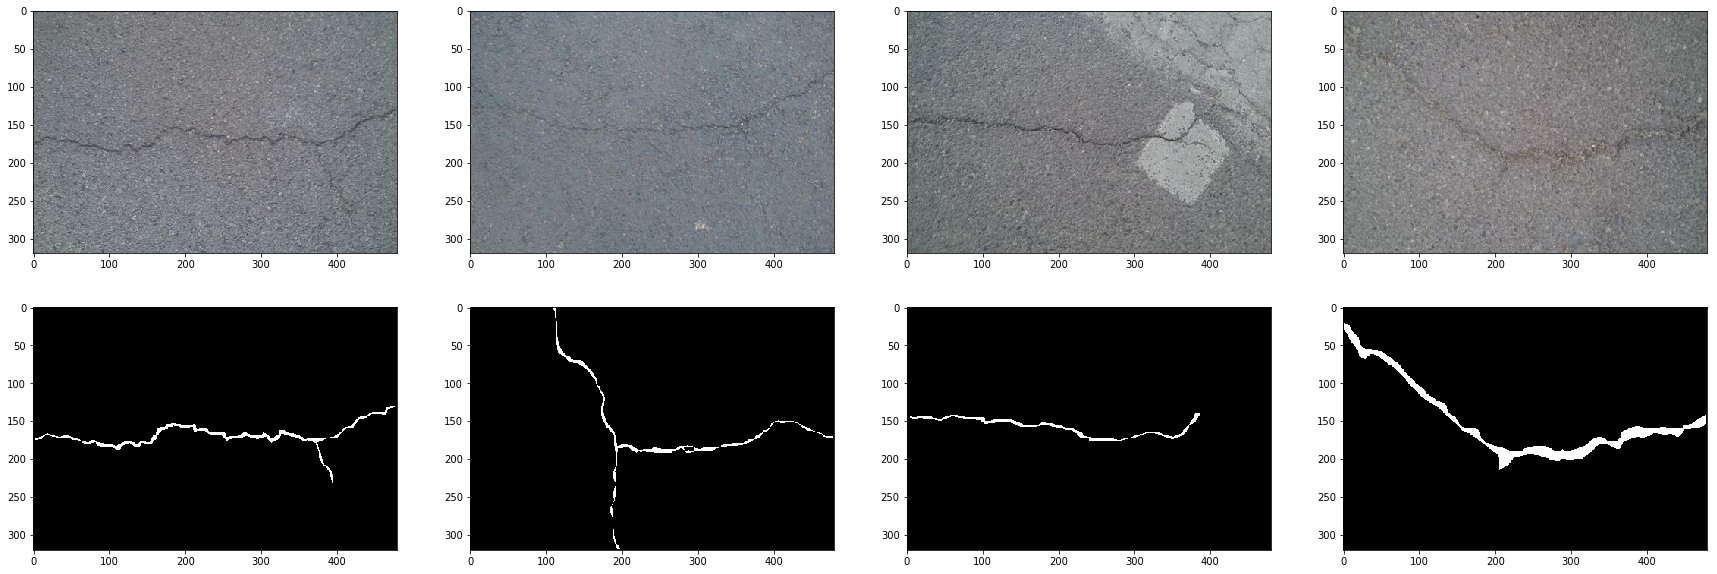

In [4]:
# Загружаем маски
masks = imread_collection('mask/*.png', True)

# Отображаем результат
fig, ax = plt.subplots(2, 4, figsize=(30, 10))

for i in range(4):
    rnd = np.random.randint(0, len(images))
    ax[0, i].imshow(images[rnd])
    ax[1, i].imshow(masks[rnd])